**Resume Classification**

**Business objective:**

- The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

**1. Import Library**

In [1]:
import os
import re
!pip install nltk
import nltk
!pip install spacy
import spacy
import string
!pip install textract
import textract
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
from matplotlib import pylab
!pip install matplotlib
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filled = input ()

/content/drive/MyDrive/Resume_DocX


In [4]:
os.listdir('/content/drive/MyDrive/Resume_DocX')

['Workday', 'SQL Developer', 'PeopleSoft', 'React JS Developer']

**2. Exctract the Text from Dataset**

In [5]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resume_DocX/PeopleSoft'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
5,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
6,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Classification: Internal\n\nClassification: In...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [7]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resume_DocX/React JS Developer'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [8]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
1,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
3,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
4,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
6,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer
7,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer


In [9]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resume_DocX/SQL Developer'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [10]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,KAMBALLA PRADEEP ...,SQL Developer
1,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
2,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
3,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
5,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
6,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
7,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
8,BUDDHA VAMSI ...,SQL Developer
9,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer


In [11]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resume_DocX/Workday'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [12]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
1,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
2,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
3,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
4,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
5,G Himaja\n\n ...,Workday
6,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
7,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
8,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
9,Vinay kumar .v\nWorkday Functional Consultant\...,Workday


**3. Create a DataFrame**

In [13]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Punugoti Swetha\n\nWorkday Technical Consultan...,NaN,NaN,NaN,Workday
75,Shireesh Balasani ...,NaN,NaN,NaN,Workday
76,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday


In [14]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


**3.1 Merge all Unnecessary column in One Column**

In [15]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,Punugoti Swetha\n\nWorkday Technical Consultan...,NaN,NaN,NaN,Workday,Workday
75,Shireesh Balasani ...,NaN,NaN,NaN,Workday,Workday
76,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,Workday


In [16]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

**3.2 Final Dataset**

In [17]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
5,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
6,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Classification: Internal\n\nClassification: In...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [18]:
resume_data["Raw_Details"][4]

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

**3.3 Save new CSV File**

In [19]:
resume_data.to_csv('Raw_Resume.csv', index=False)

**4. Data Understanding**

In [20]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
...,...,...
74,Workday,Punugoti Swetha\n\nWorkday Technical Consultan...
75,Workday,Shireesh Balasani ...
76,Workday,Workday Integration Consultant\n\n\n\nName ...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [21]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
58,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
59,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
60,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
61,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
62,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
63,Workday,G Himaja\n\n ...
64,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
65,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
66,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
67,Workday,Vinay kumar .v\nWorkday Functional Consultant\...


In [22]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

**4.1 Number of Words in each Resume**

In [23]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023


**4.2 Number of Characters**

In [24]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010


**4.3 Number of Stopwords**

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Raw_Details,Stopwords
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,PeopleSoft Administration\n\n \n\nVivekanand S...,520
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190


**4.4 Number of Numerics**

In [26]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,PeopleSoft Administration\n\n \n\nVivekanand S...,17
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4


In [27]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
...,...,...,...,...,...,...
74,Workday,Punugoti Swetha\n\nWorkday Technical Consultan...,541,4691,141,3
75,Workday,Shireesh Balasani ...,1945,11615,365,16
76,Workday,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1035,6943,193,7


**5. Text Pre-Processing**

5.1 Using Regular Expression

In [28]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [29]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

**5.2 Clean Text from Resume**

In [30]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
...,...,...,...
74,Workday,Punugoti Swetha\n\nWorkday Technical Consultan...,punugoti swetha workday technical consultant p...
75,Workday,Shireesh Balasani ...,shireesh balasani hcm consultant profile summa...
76,Workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant name sri krishn...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant professional ...


**5.3 Save the Clean Data in new CSV File**

In [31]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...
...,...,...
74,Workday,punugoti swetha workday technical consultant p...
75,Workday,shireesh balasani hcm consultant profile summa...
76,Workday,workday integration consultant name sri krishn...
77,Workday,venkateswarlu workday consultant professional ...


In [32]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [33]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...
...,...,...
74,Workday,punugoti swetha workday technical consultant p...
75,Workday,shireesh balasani hcm consultant profile summa...
76,Workday,workday integration consultant name sri krishn...
77,Workday,venkateswarlu workday consultant professional ...


In [34]:
resume_data.Resume_Details[5]

'tanna sujatha objective seeking challenging role area work organization utilize functional knowledge provide best solutions business professional summary functional expertise peoplesoft finance modules purchase account payables experienced working reporting tools like query end end functional knowledge modules handled various change requests user synopsis energetic result oriented professional years experience extended expertise peoplesoft financials area design maintenance production support deep understanding technology focus delivering business solutions presently working system engineer excellent decision making skills positive approach dedicated highly ambitious achieve personal goals well organizational goals ability build new territories expand opportunities towards achievement stated targets education btech kaushik college engineering visakhapatnam academic percentage puc narayana junior college visakhapatnam academic percentage high school burja academic percentage software p

**6. Named Entity Recognition (NER)**

In [35]:
import nltk
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 327), ('reports', 326), ('sql', 280), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('technical', 164), ('creating', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


**7. Parts Of Speech (POS) Tagging**

In [36]:
#nlp = spacy.load('en_core_web_lg')
!python -m spacy download en_core_web_lg
one_block = cleanedSentences[1300:5200]
nlp = spacy.load('en_core_web_lg')
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

2023-07-14 18:50:05.393119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 753.8 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [37]:
for token in doc_block[:30]:
    print(token,token.pos_)

do AUX
people NOUN
books NOUN
windows NOUN
depth NOUN
experience NOUN
peoplesoft ADJ
update NOUN
manager NOUN
pum PROPN
applying VERB
peopletools NOUN
patches NOUN
application NOUN
bundles NOUN
peopletools NOUN
hrms NOUN
fscm PROPN
applications VERB
depth NOUN
experience NOUN
integration NOUN
broker NOUN
setup NOUN
experience NOUN
secure ADJ
socket NOUN
layer NOUN
ssl PROPN
implementation NOUN



**7.1 Filtering out only the Nouns and Verbs from the Text to Tokens**

In [38]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['years', 'experience', 'hope', 'enhance', 'skill', 'set', 'adding', 'value', 'business', 'enable', 'implementation', 'solutions', 'aid', 'company', 'objectives', 'understanding', 'anticipating', 'needs', 'interests', 'motivations', 'clients', 'deliver', 'time', 'budget', 'quality', 'delivering', 'value', 'improving', 'agility', 'quality', 'reliability', 'summary', 'years', 'experience', 'implementation', 'support', 'people', 'tools', 'upgrades', 'configuration', 'migrations', 'maintenance', 'administration', 'application', 'server', 'domains', 'process', 'scheduler', 'servers', 'web', 'server', 'domains', 'search', 'involved', 'tools', 'application', 'upgrades', 'experience', 'driving', 'infrastructure', 'hardware', 'upgrades', 'disaster', 'recovery', 'activities', 'configured', 'web', 'server', 'monitor', 'system', 'developing', 'maintaining', 'monitoring', 'shell', 'scripts', 'experience', 'health', 'check', 'environments', 'experience', 'database', 'refreshes', 'production', 'devel

**7.2 Counting all the Nouns and Verbs present in the Tokens of words**

In [39]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,545
1,application,417
2,using,384
3,workday,352
4,reports,326
5,data,307
6,project,290
7,business,259
8,server,243
9,web,238


**7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently**

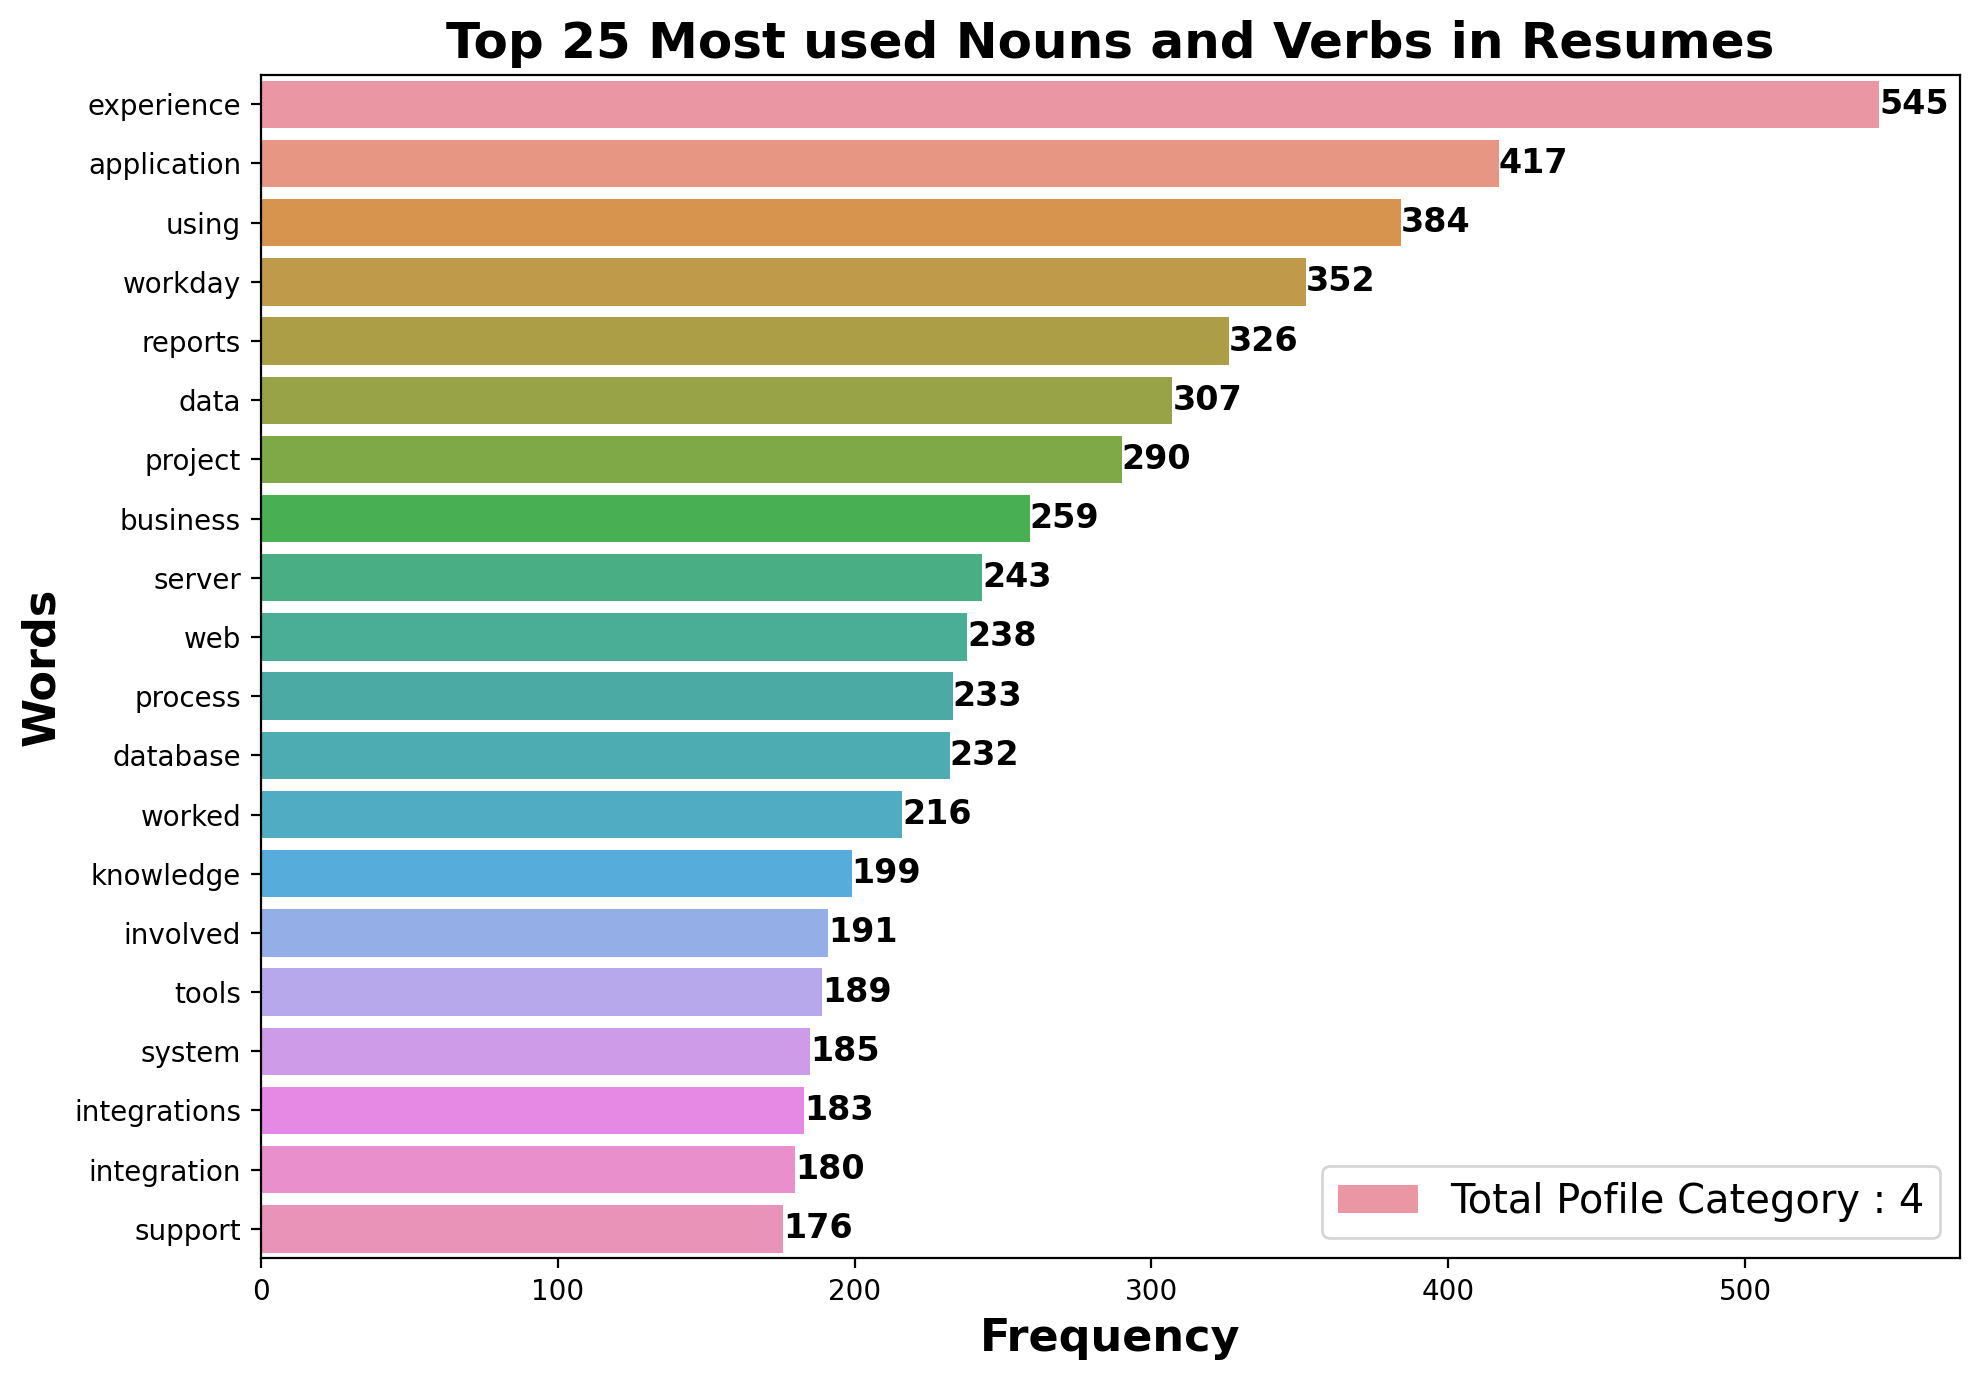

In [40]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

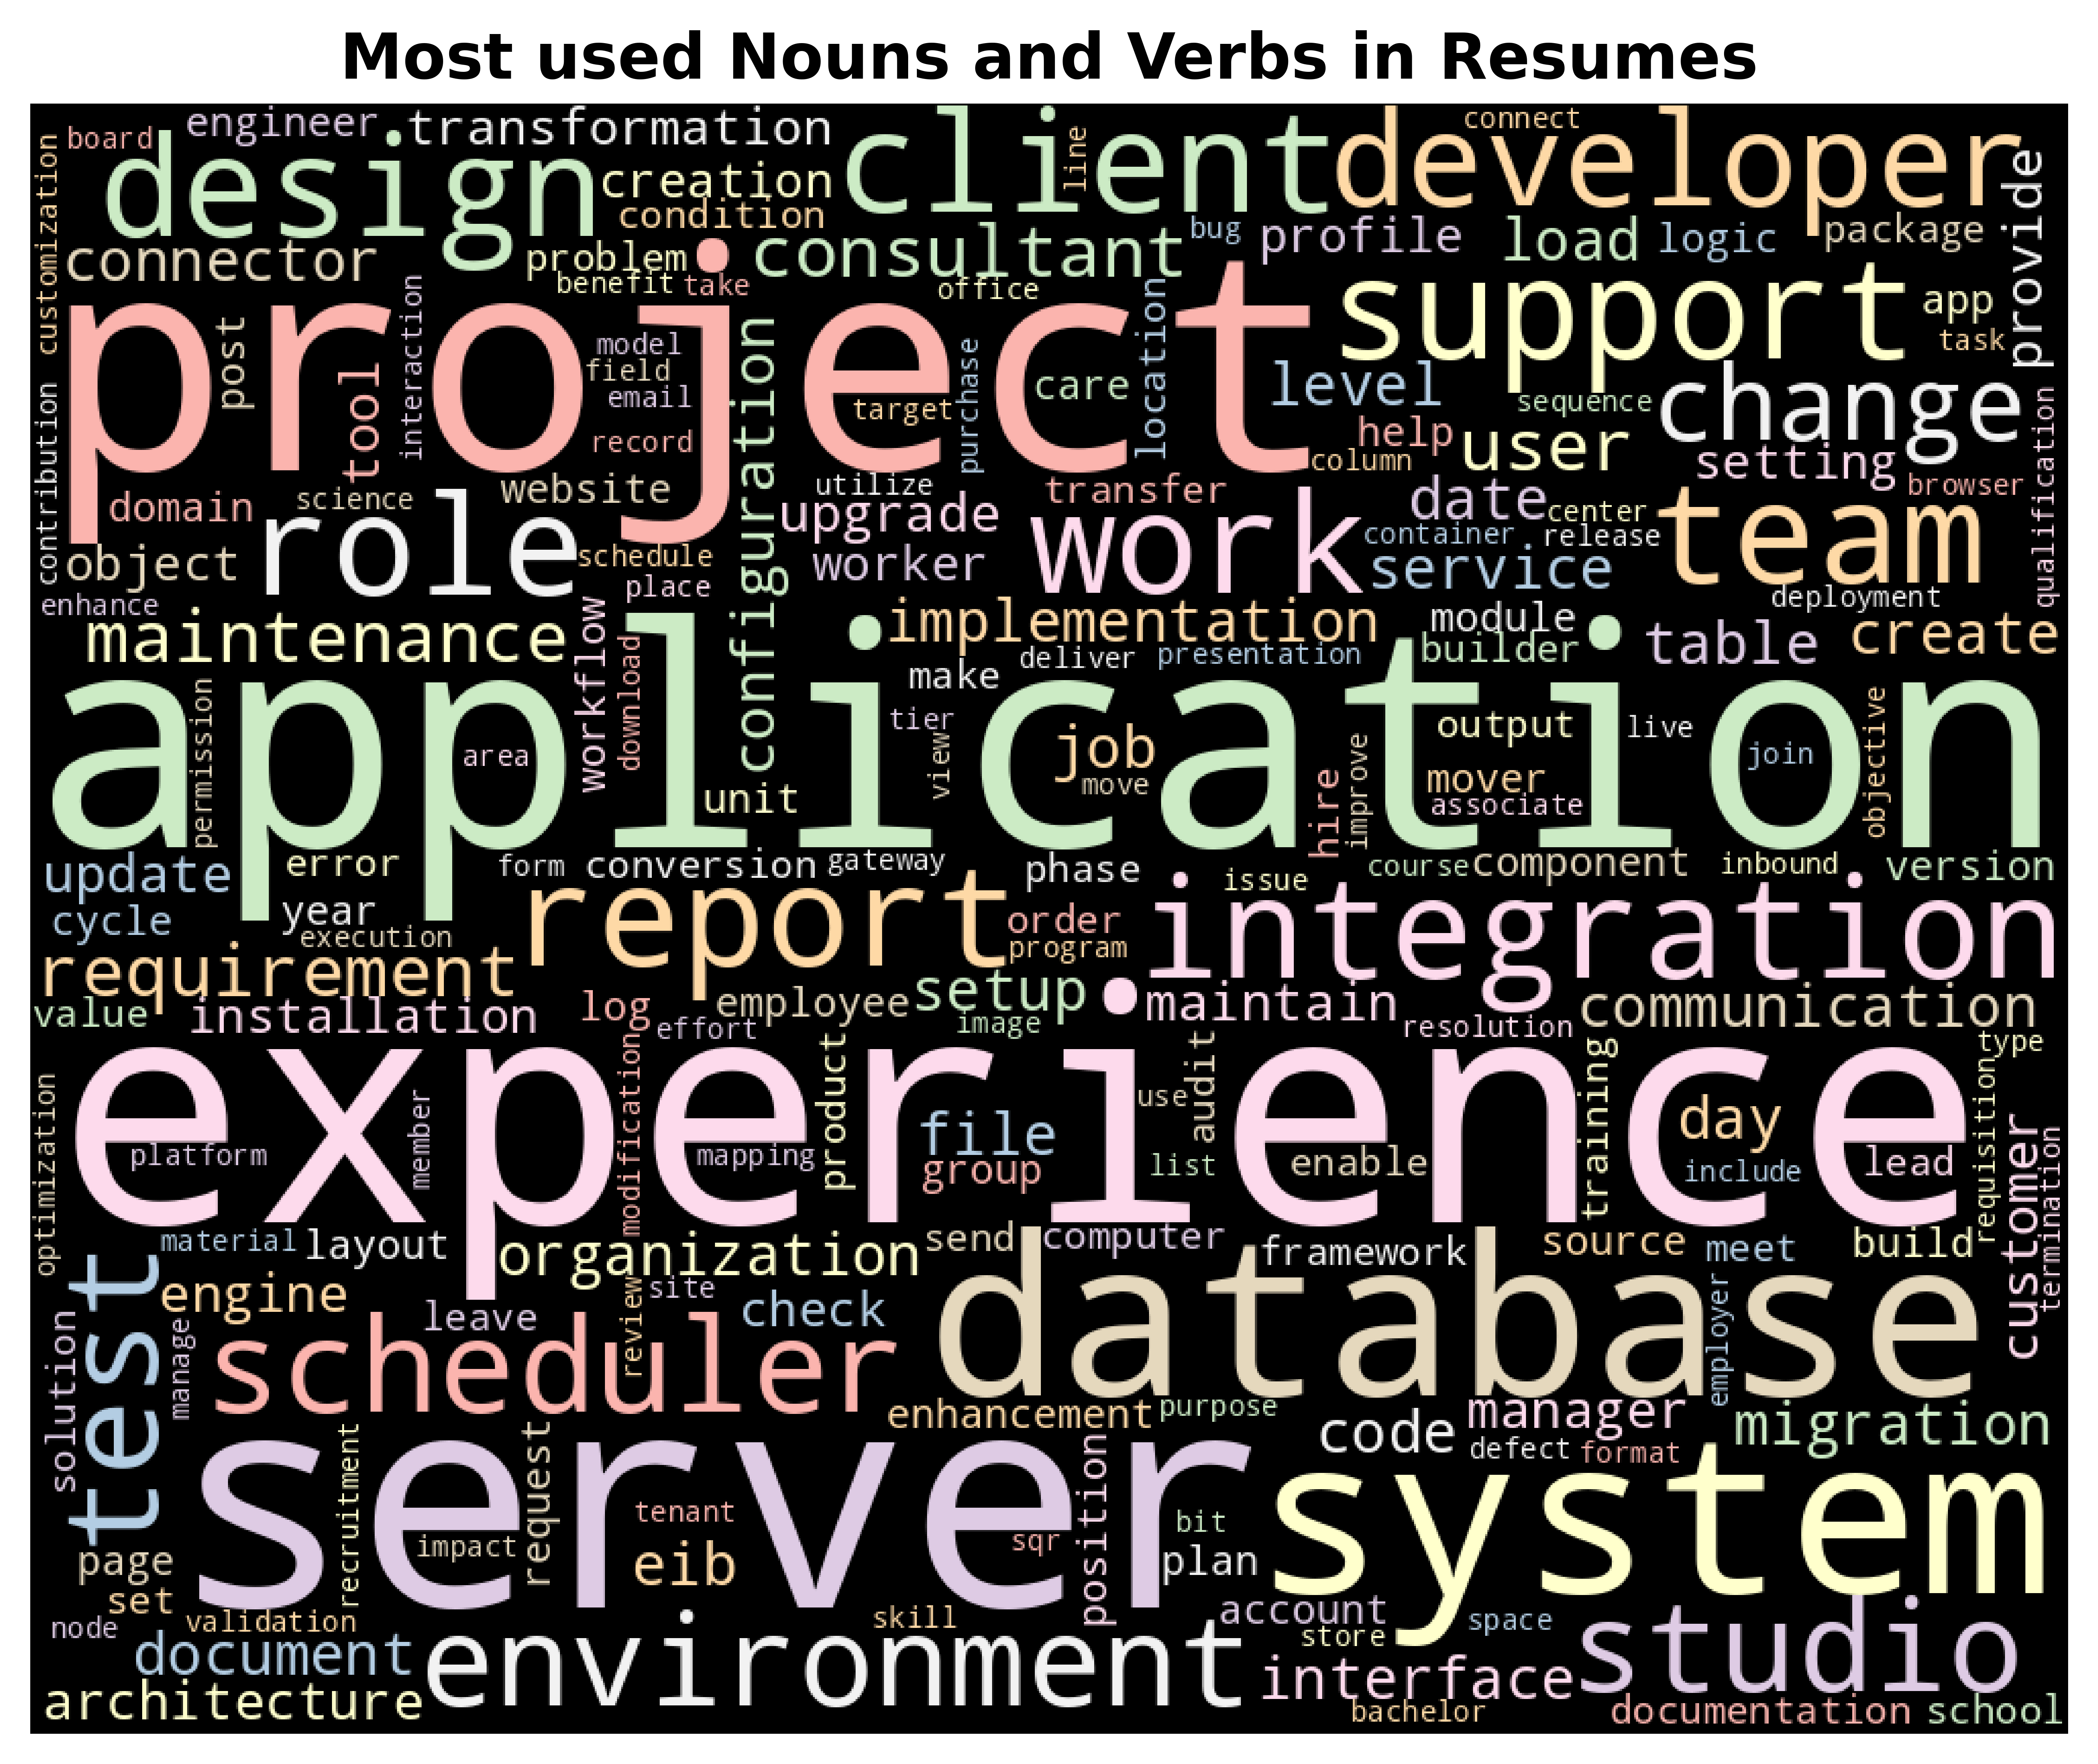

In [41]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**THE END !!!**

**EDA Resume Classification**

In [42]:
import os
!pip install spacy
import spacy
!pip install docx2txt
import docx2txt
import numpy as np
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

**8. Extract Resumes by Profile Category**

In [43]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...
...,...,...
74,Workday,punugoti swetha workday technical consultant p...
75,Workday,shireesh balasani hcm consultant profile summa...
76,Workday,workday integration consultant name sri krishn...
77,Workday,venkateswarlu workday consultant professional ...


In [44]:
resume_data.Category.value_counts().index

Index(['React JS Developer', 'Workday', 'PeopleSoft', 'SQL Developer'], dtype='object')

In [45]:
resume_data.Category.value_counts()

React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Category, dtype: int64

**9. Number of Total Resumes**

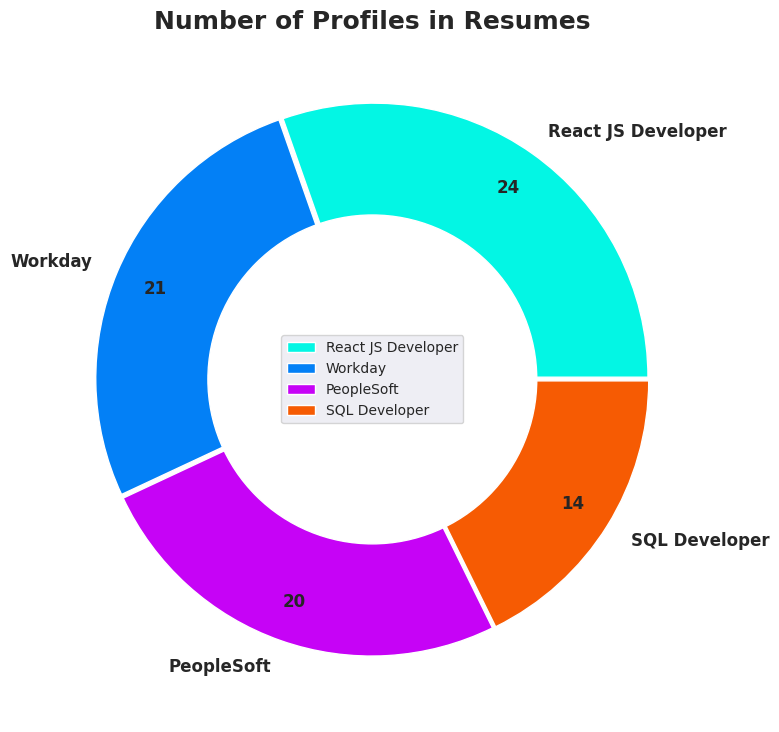

In [46]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

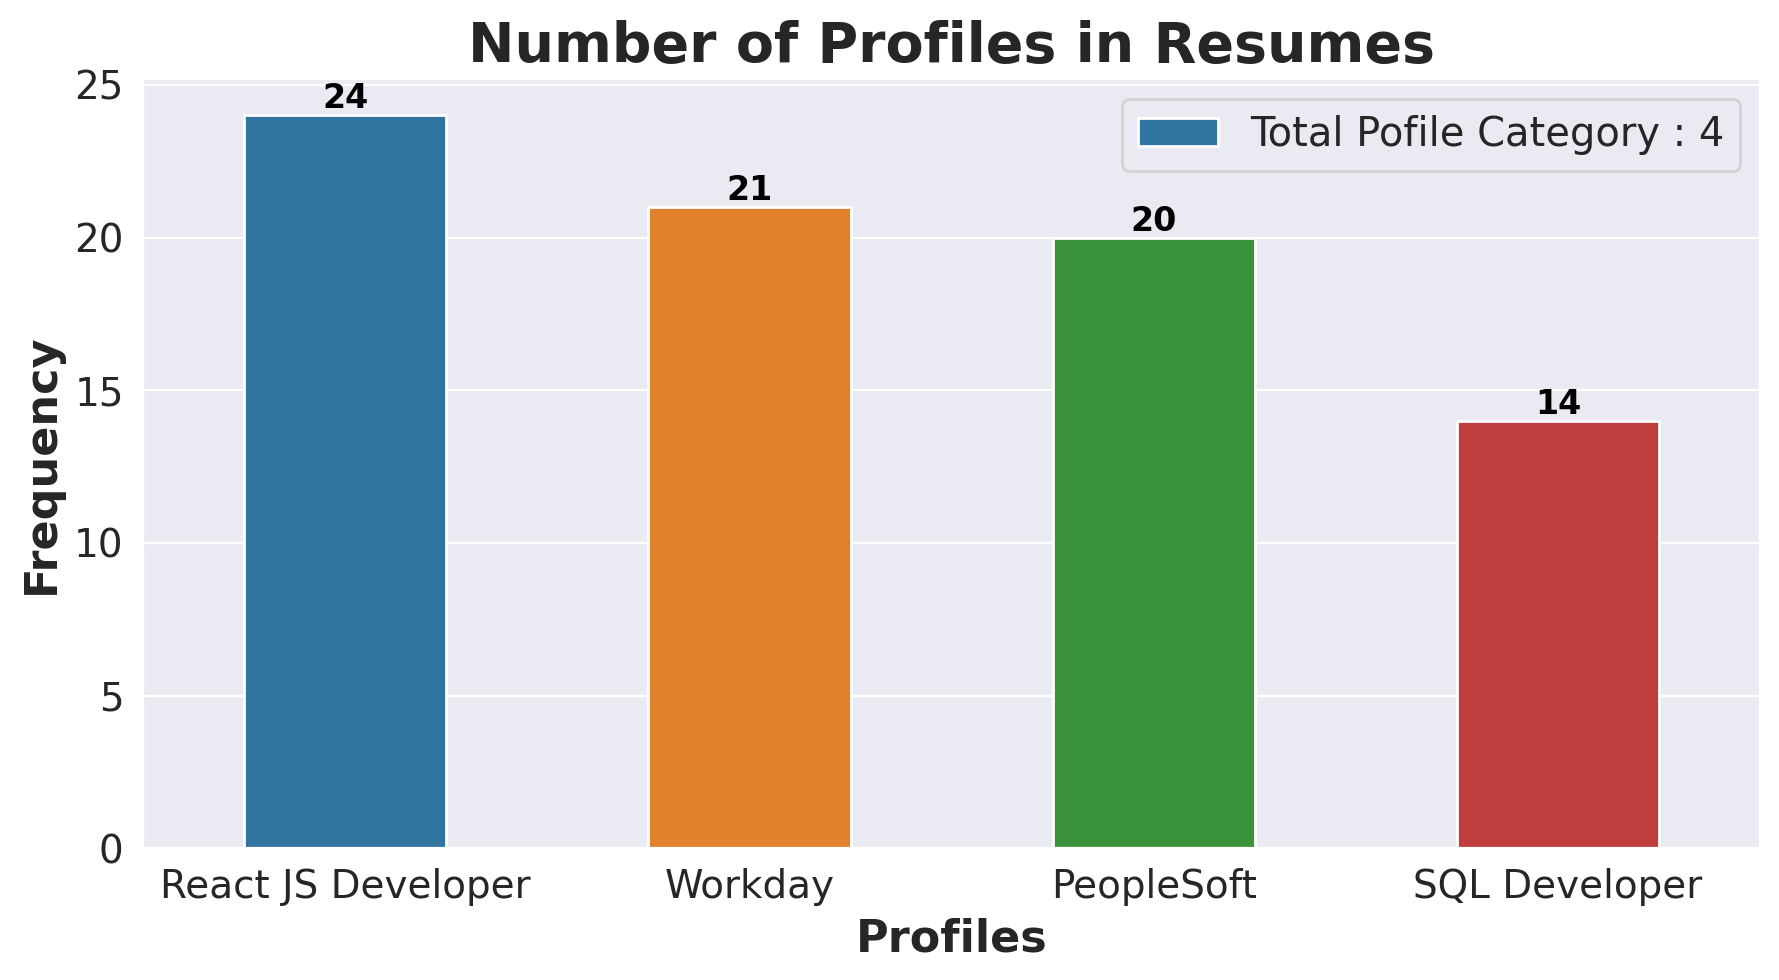

In [47]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Category.value_counts().index, y= resume_data.Category.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

**10. Percentage of Profiles Category**

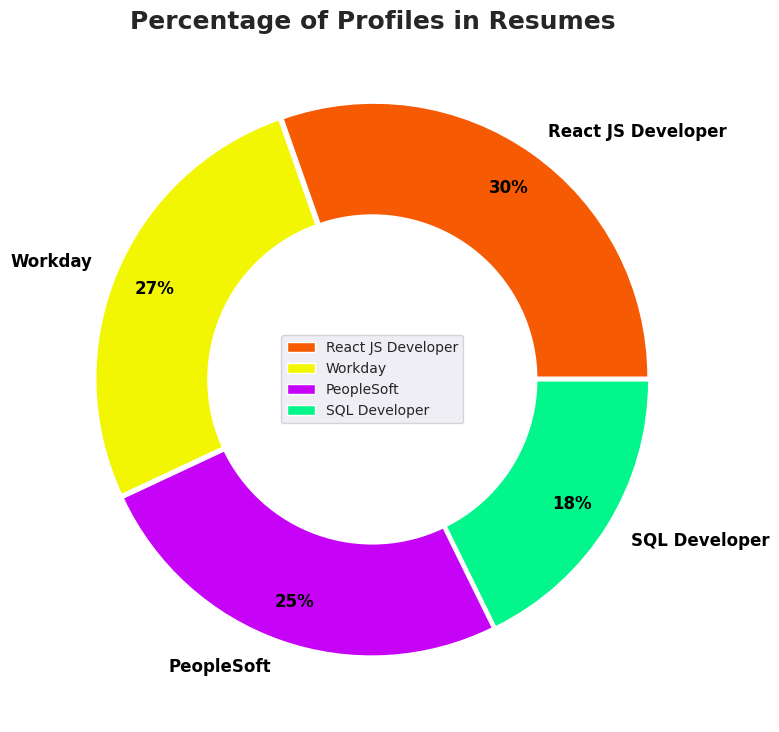

In [48]:
fig = plt.figure(figsize=(8,8),dpi=100)

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

**11. Reading a Resume File**

In [49]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/drive/MyDrive/Resume_DocX/React JS Developer/React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

**12**. **Data Exploration**

In [50]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...
...,...,...
74,Workday,punugoti swetha workday technical consultant p...
75,Workday,shireesh balasani hcm consultant profile summa...
76,Workday,workday integration consultant name sri krishn...
77,Workday,venkateswarlu workday consultant professional ...


**12.1. N-grams**

- **N-grams analyses are often used to see which words often show up together.**

In [51]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['murali']),
 WordList(['professional']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['peoplesoft']),
 WordList(['application']),
 WordList(['enhancement']),
 WordList(['support']),
 WordList(['upgrade']),
 WordList(['projects']),
 WordList(['well']),
 WordList(['experienced']),
 WordList(['people']),
 WordList(['tools']),
 WordList(['functional']),
 WordList(['knowledge']),
 WordList(['hcm']),
 WordList(['fscm']),
 WordList(['applications'])]

In [52]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['murali', 'professional']),
 WordList(['professional', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'peoplesoft']),
 WordList(['peoplesoft', 'application']),
 WordList(['application', 'enhancement']),
 WordList(['enhancement', 'support']),
 WordList(['support', 'upgrade']),
 WordList(['upgrade', 'projects']),
 WordList(['projects', 'well']),
 WordList(['well', 'experienced']),
 WordList(['experienced', 'people']),
 WordList(['people', 'tools']),
 WordList(['tools', 'functional']),
 WordList(['functional', 'knowledge']),
 WordList(['knowledge', 'hcm']),
 WordList(['hcm', 'fscm']),
 WordList(['fscm', 'applications']),
 WordList(['applications', 'skill'])]

In [53]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['murali', 'professional', 'summary']),
 WordList(['professional', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'peoplesoft']),
 WordList(['experience', 'peoplesoft', 'application']),
 WordList(['peoplesoft', 'application', 'enhancement']),
 WordList(['application', 'enhancement', 'support']),
 WordList(['enhancement', 'support', 'upgrade']),
 WordList(['support', 'upgrade', 'projects']),
 WordList(['upgrade', 'projects', 'well']),
 WordList(['projects', 'well', 'experienced']),
 WordList(['well', 'experienced', 'people']),
 WordList(['experienced', 'people', 'tools']),
 WordList(['people', 'tools', 'functional']),
 WordList(['tools', 'functional', 'knowledge']),
 WordList(['functional', 'knowledge', 'hcm']),
 WordList(['knowledge', 'hcm', 'fscm']),
 WordList(['hcm', 'fscm', 'applications']),
 WordList(['fscm', 'applications', 'skill']),
 WordList(['applications', 'skill', 'people'])]

In [54]:
resume_data['Resume_Details']

0     peoplesoft admin varkala vikas career objectiv...
1     murali professional summary years experience p...
2     sirazuddin bangalore india sirazuddin bangalor...
3     peoplesoft administration vivekanand sayana ca...
4     anubhav kumar singh core competencies scriptin...
                            ...                        
74    punugoti swetha workday technical consultant p...
75    shireesh balasani hcm consultant profile summa...
76    workday integration consultant name sri krishn...
77    venkateswarlu workday consultant professional ...
78    harikrishna akula summary years experience aro...
Name: Resume_Details, Length: 79, dtype: object

**12.2. Top 20 most used words in Resumes**

- Using CountVectorizer

In [55]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [56]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,600,experience
1,453,peoplesoft
2,432,workday
3,418,application
4,395,using
5,359,server
6,332,data
7,327,project
8,326,reports
9,280,sql


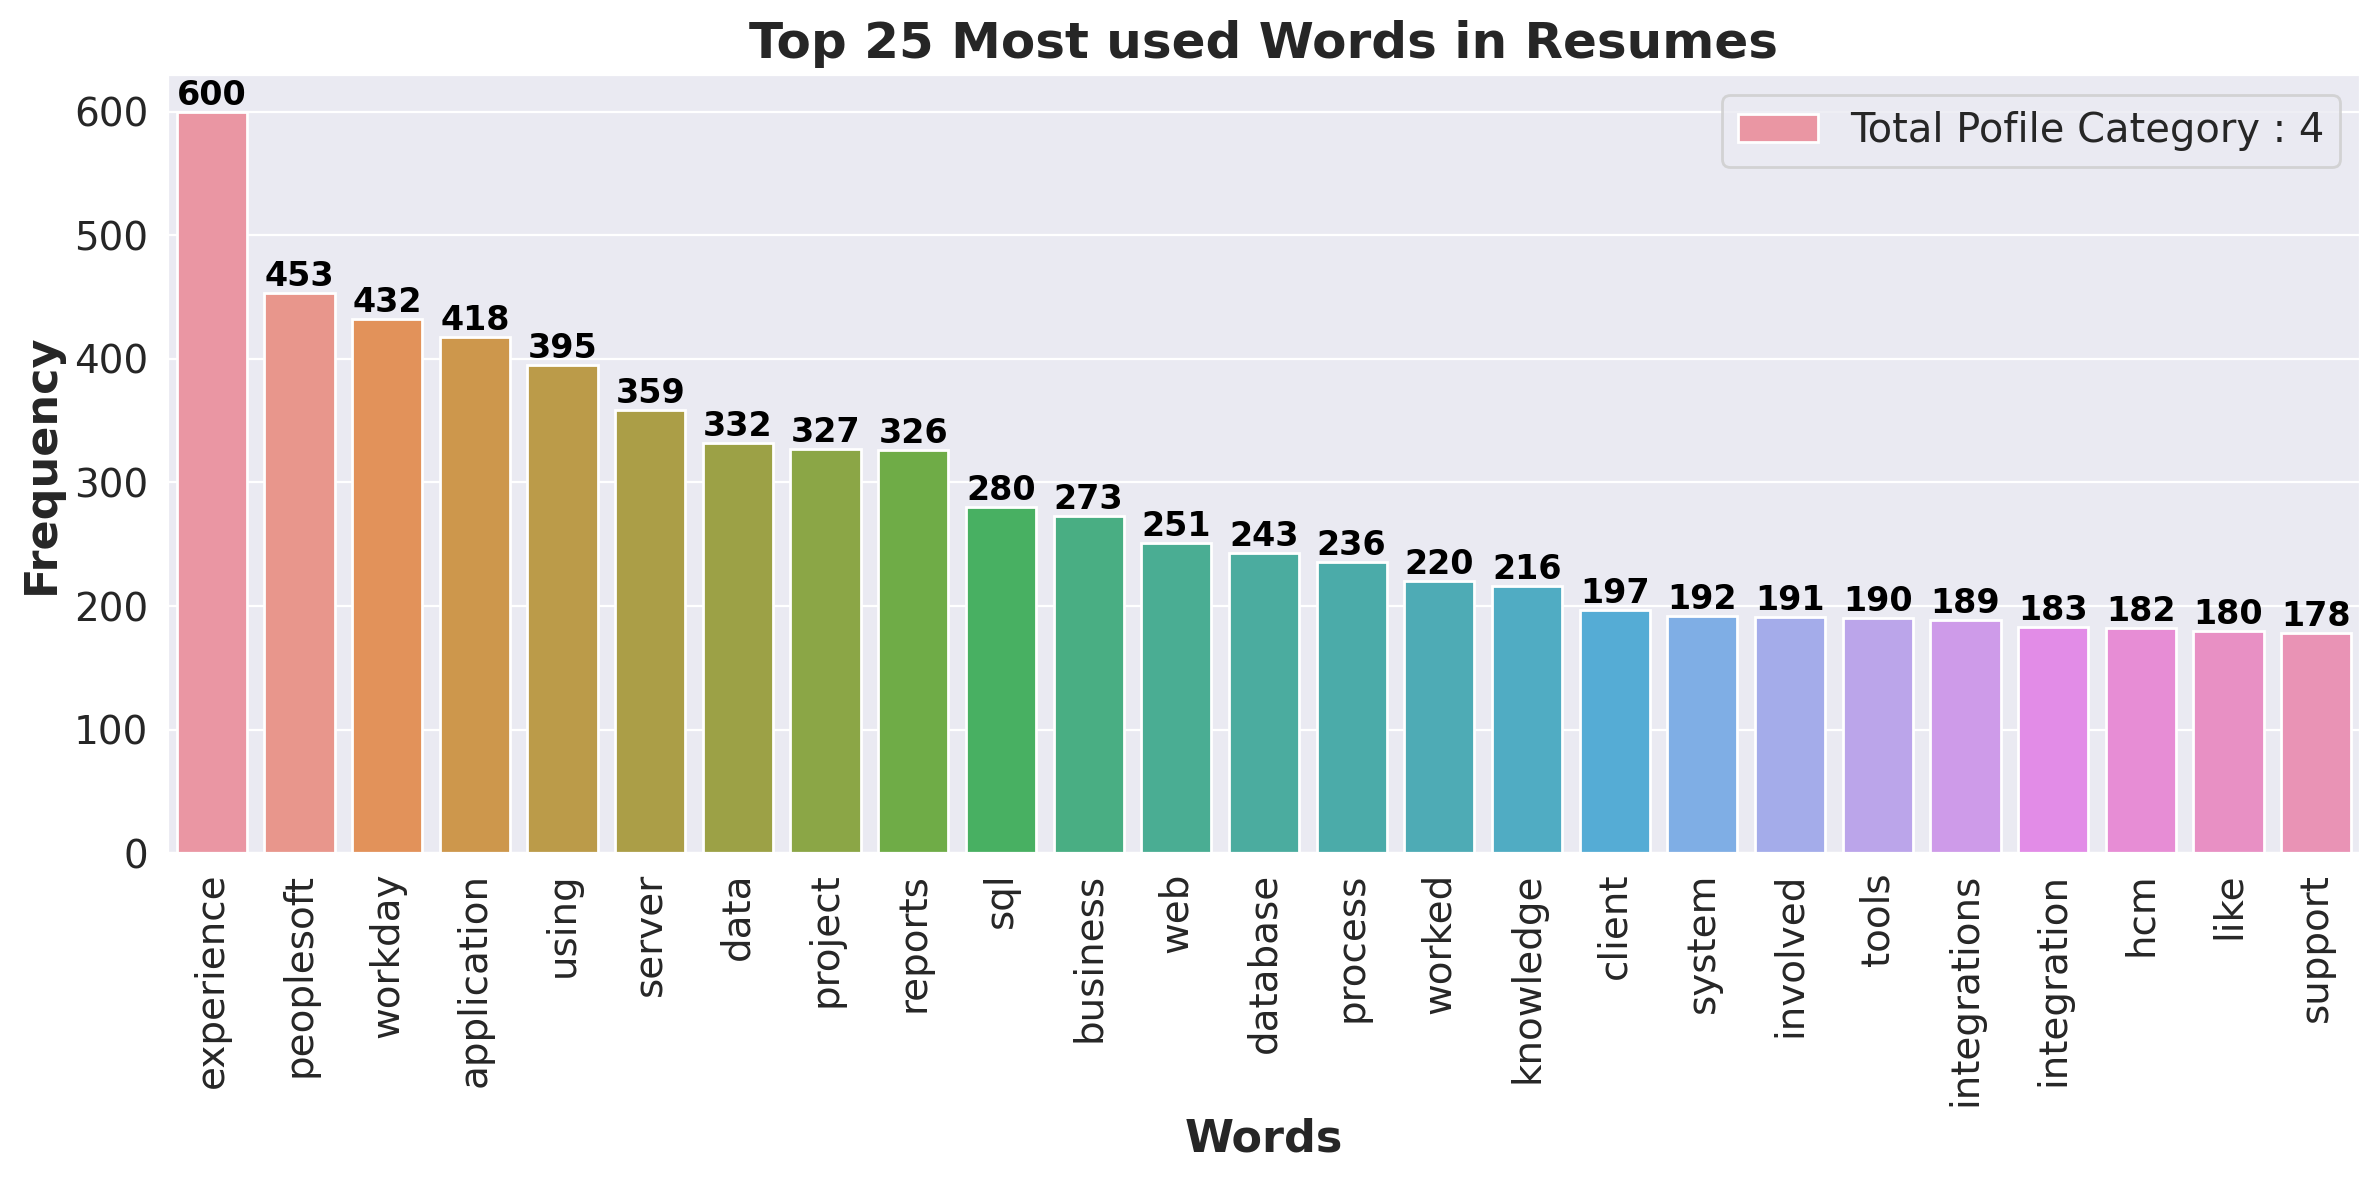

In [57]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


**12.3. Using the Word Clowds**

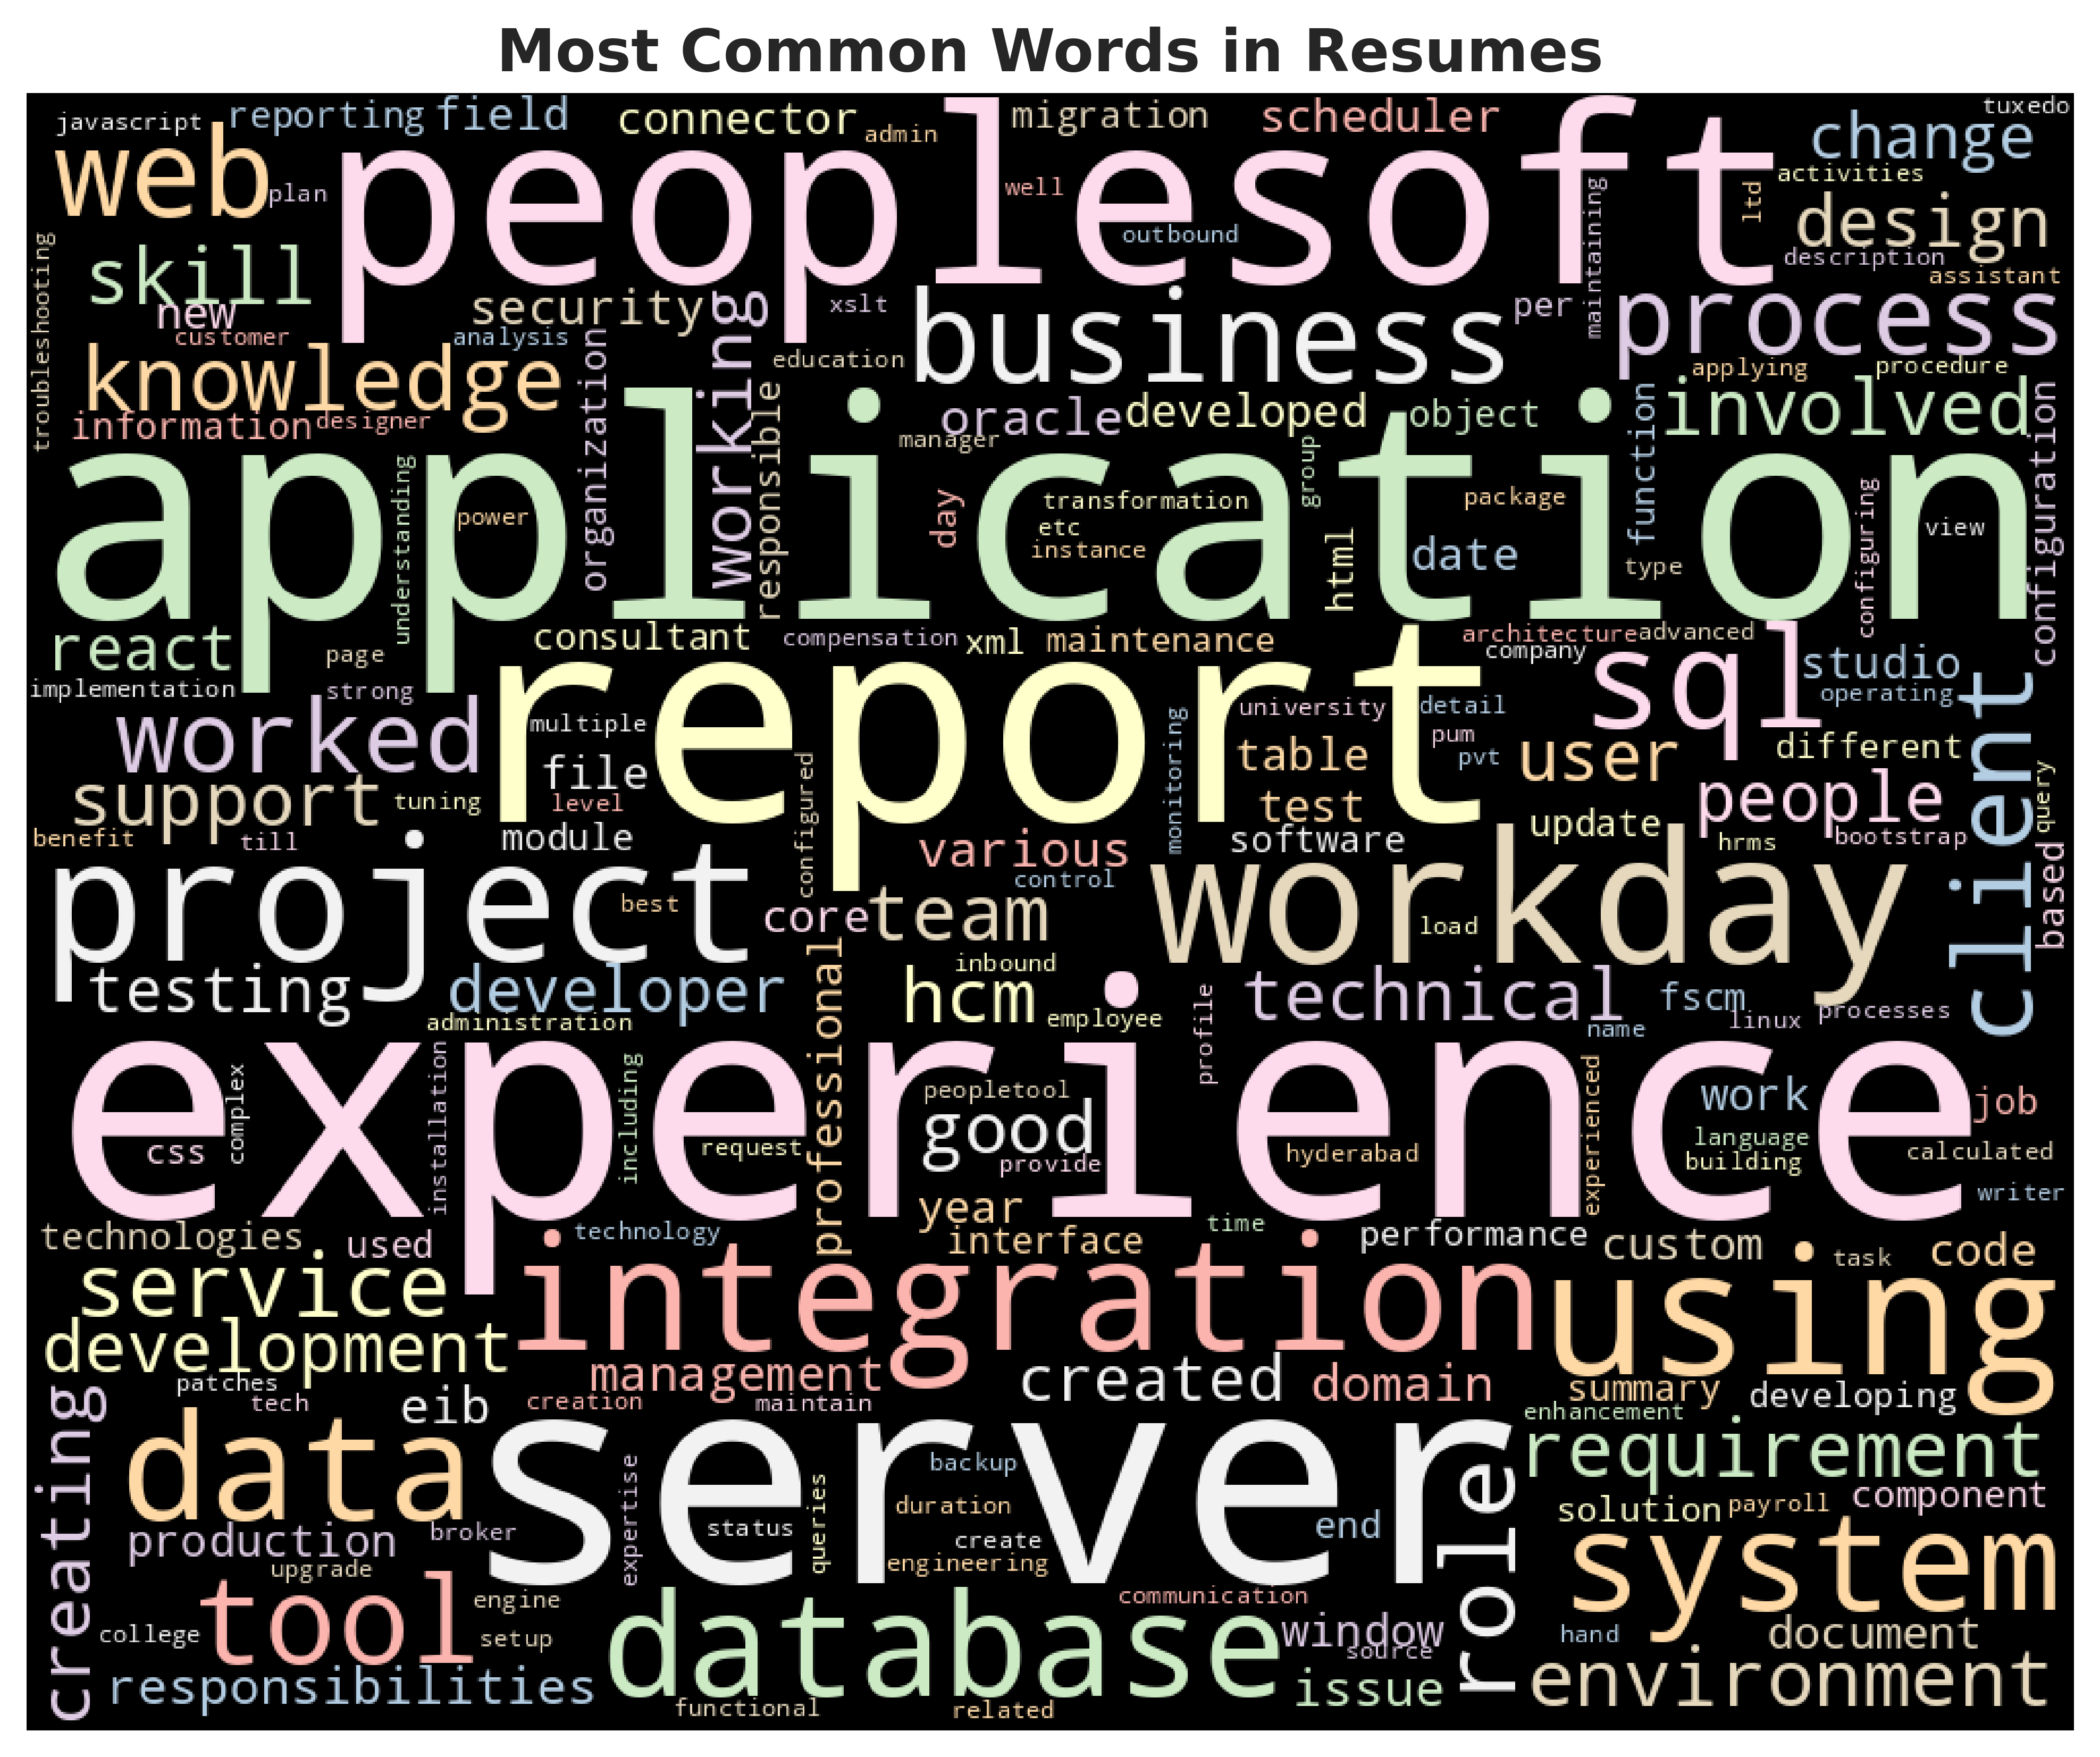

In [58]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**THE END !!**

**Model Building**

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [60]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...


**13. Data Preprocessing**

**13.1. LabelEncoder**

In [61]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,0
1,PeopleSoft,murali professional summary years experience p...,0
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,0
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...,0
4,PeopleSoft,anubhav kumar singh core competencies scriptin...,0
...,...,...,...
74,Workday,punugoti swetha workday technical consultant p...,3
75,Workday,shireesh balasani hcm consultant profile summa...,3
76,Workday,workday integration consultant name sri krishn...,3
77,Workday,venkateswarlu workday consultant professional ...,3


In [62]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [63]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

**14.0 Model Building**

**14.1 Train - Test Split**

In [64]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

**14.2 TF-IDF Vectorization**

In [66]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [67]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [68]:
x_train.shape, x_test.shape

((59, 3683), (20, 3683))

In [69]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft'
 'PeopleSoft' 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday'
 'Workday' 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']
['PeopleSoft' 'PeopleSoft' 'React JS Developer' 'Workday' 'Workday'
 'React JS Developer' 'R

(None, None)

**15. Classification Models**

**15.1 KNN Classifier**

In [70]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.60
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       0.50      0.20      0.29         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.42      1.00      0.59         5

          accuracy                           0.60        20
         macro avg       0.48      0.55      0.47        20
      weighted avg       0.53      0.60      0.52        20




**15.2 Decision Tree Classifier**

In [71]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      0.80      0.89         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




**15.3 Random Forest Classifier**

In [72]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




**15.4 Support Vectore Machine (SVM) Classifier**

In [73]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.95        20
      weighted avg       0.96      0.95      0.95        20




**15.5 Logistic Regression**

In [74]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.95        20
      weighted avg       0.96      0.95      0.95        20




**15.6 Bagging Classifier**

In [75]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




**15.7 AdaBoost Classifier**

In [76]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.60
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         5
React JS Developer       0.46      1.00      0.63         6
     SQL Developer       1.00      0.50      0.67         4
           Workday       1.00      0.80      0.89         5

          accuracy                           0.60        20
         macro avg       0.62      0.57      0.55        20
      weighted avg       0.59      0.60      0.55        20




**15.8 Gradient Boosting Classifier**

In [77]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.95        20
      weighted avg       0.96      0.95      0.95        20




**15.9 Naive Bayes Classifier**

In [78]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




**16. Model Evaluation**

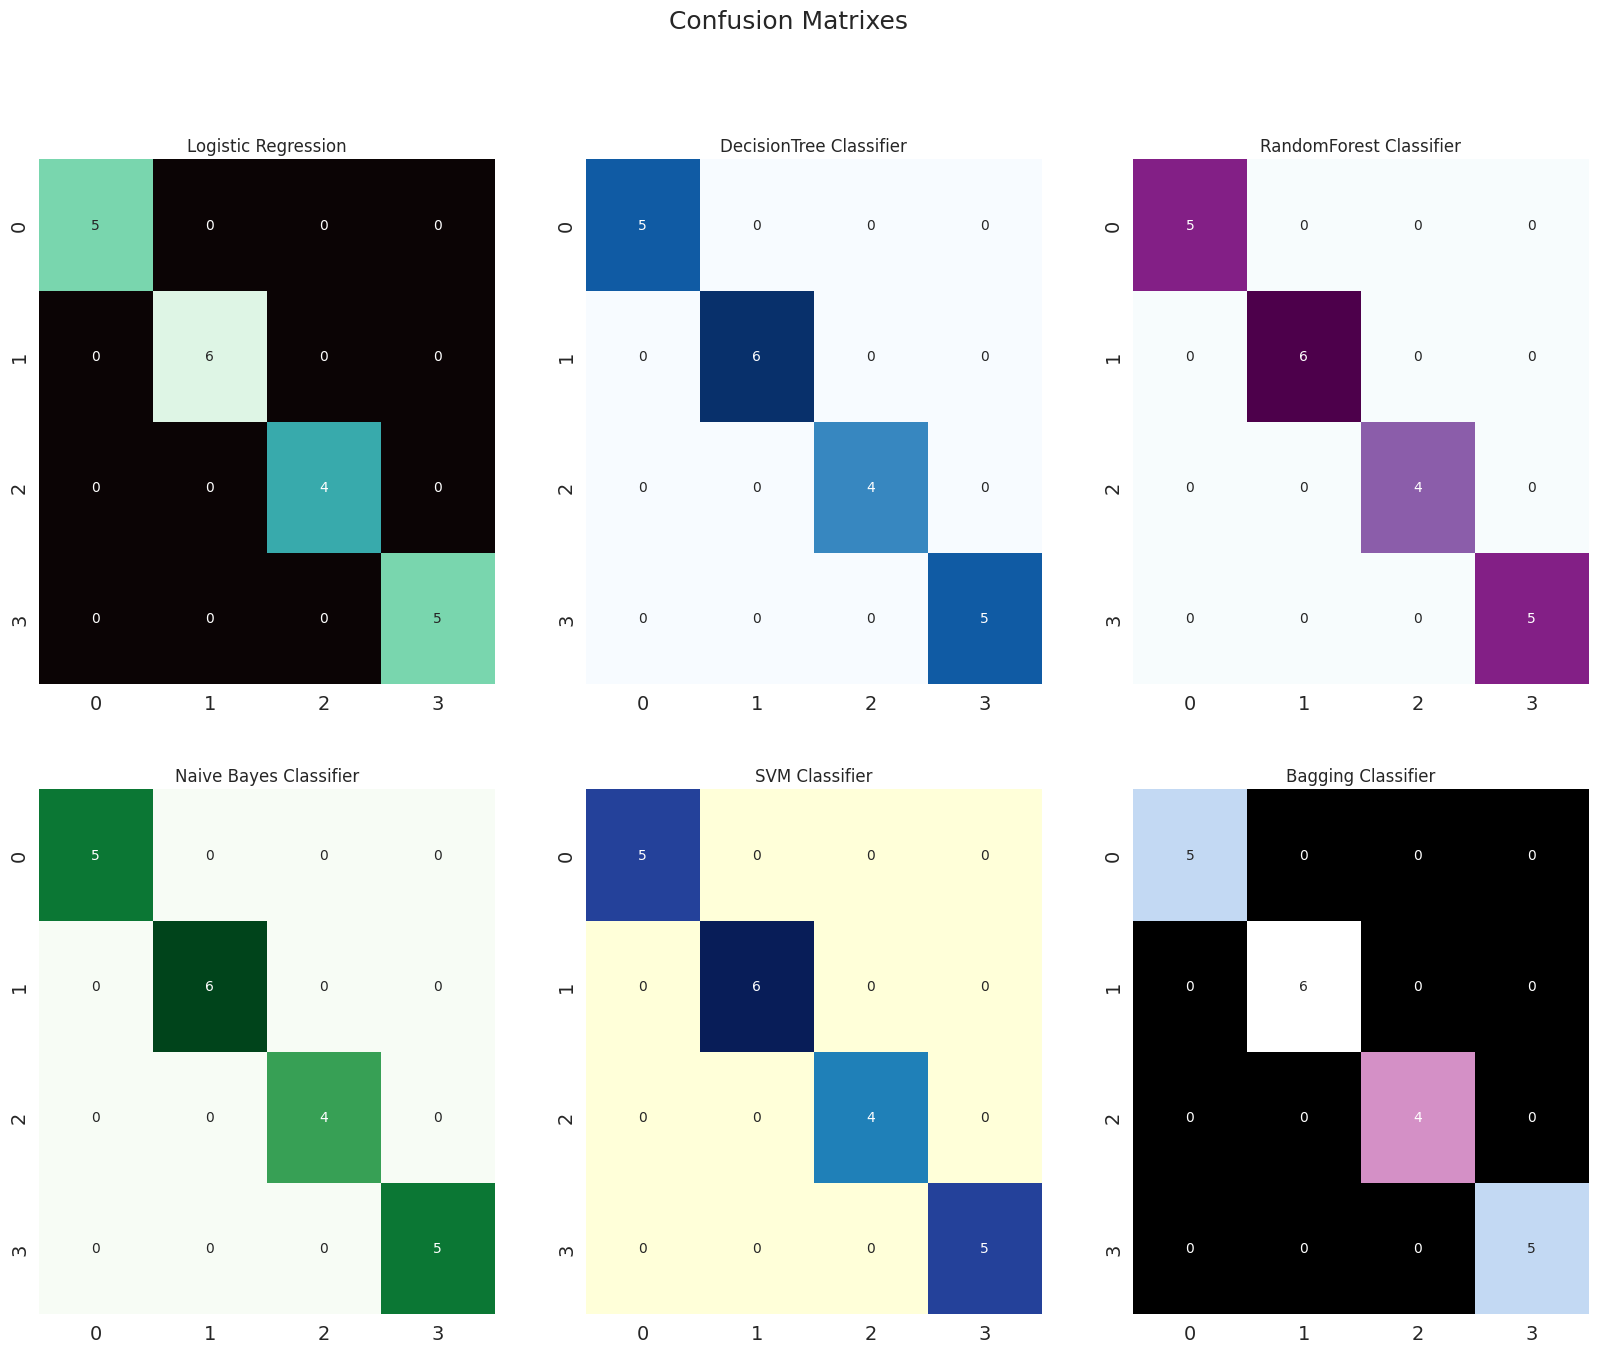

In [79]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="mako",  fmt="d")

plt.subplot(2,3,2)
plt.title("DecisionTree Classifier")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="Blues", fmt="d")

plt.subplot(2,3,3)
plt.title("RandomForest Classifier")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Classifier")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(2,3,5)
plt.title("SVM Classifier")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

plt.subplot(2,3,6)
plt.title("Bagging Classifier")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="cubehelix", fmt="d")



plt.show()

In [80]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.694915,0.60,0.48,0.55,0.47
1,DecisionTree Classifier,1.000000,0.95,0.96,0.95,0.95
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.95,0.96,0.94,0.95
4,Logistic Regression,1.000000,0.95,0.96,0.94,0.95
5,Bagging Classifier,0.949153,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.745763,0.60,0.62,0.57,0.55
7,Gradient Boosting Classifier,1.000000,0.95,0.96,0.94,0.95
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [81]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

**16.1 Train and Test Accuracy Plot**

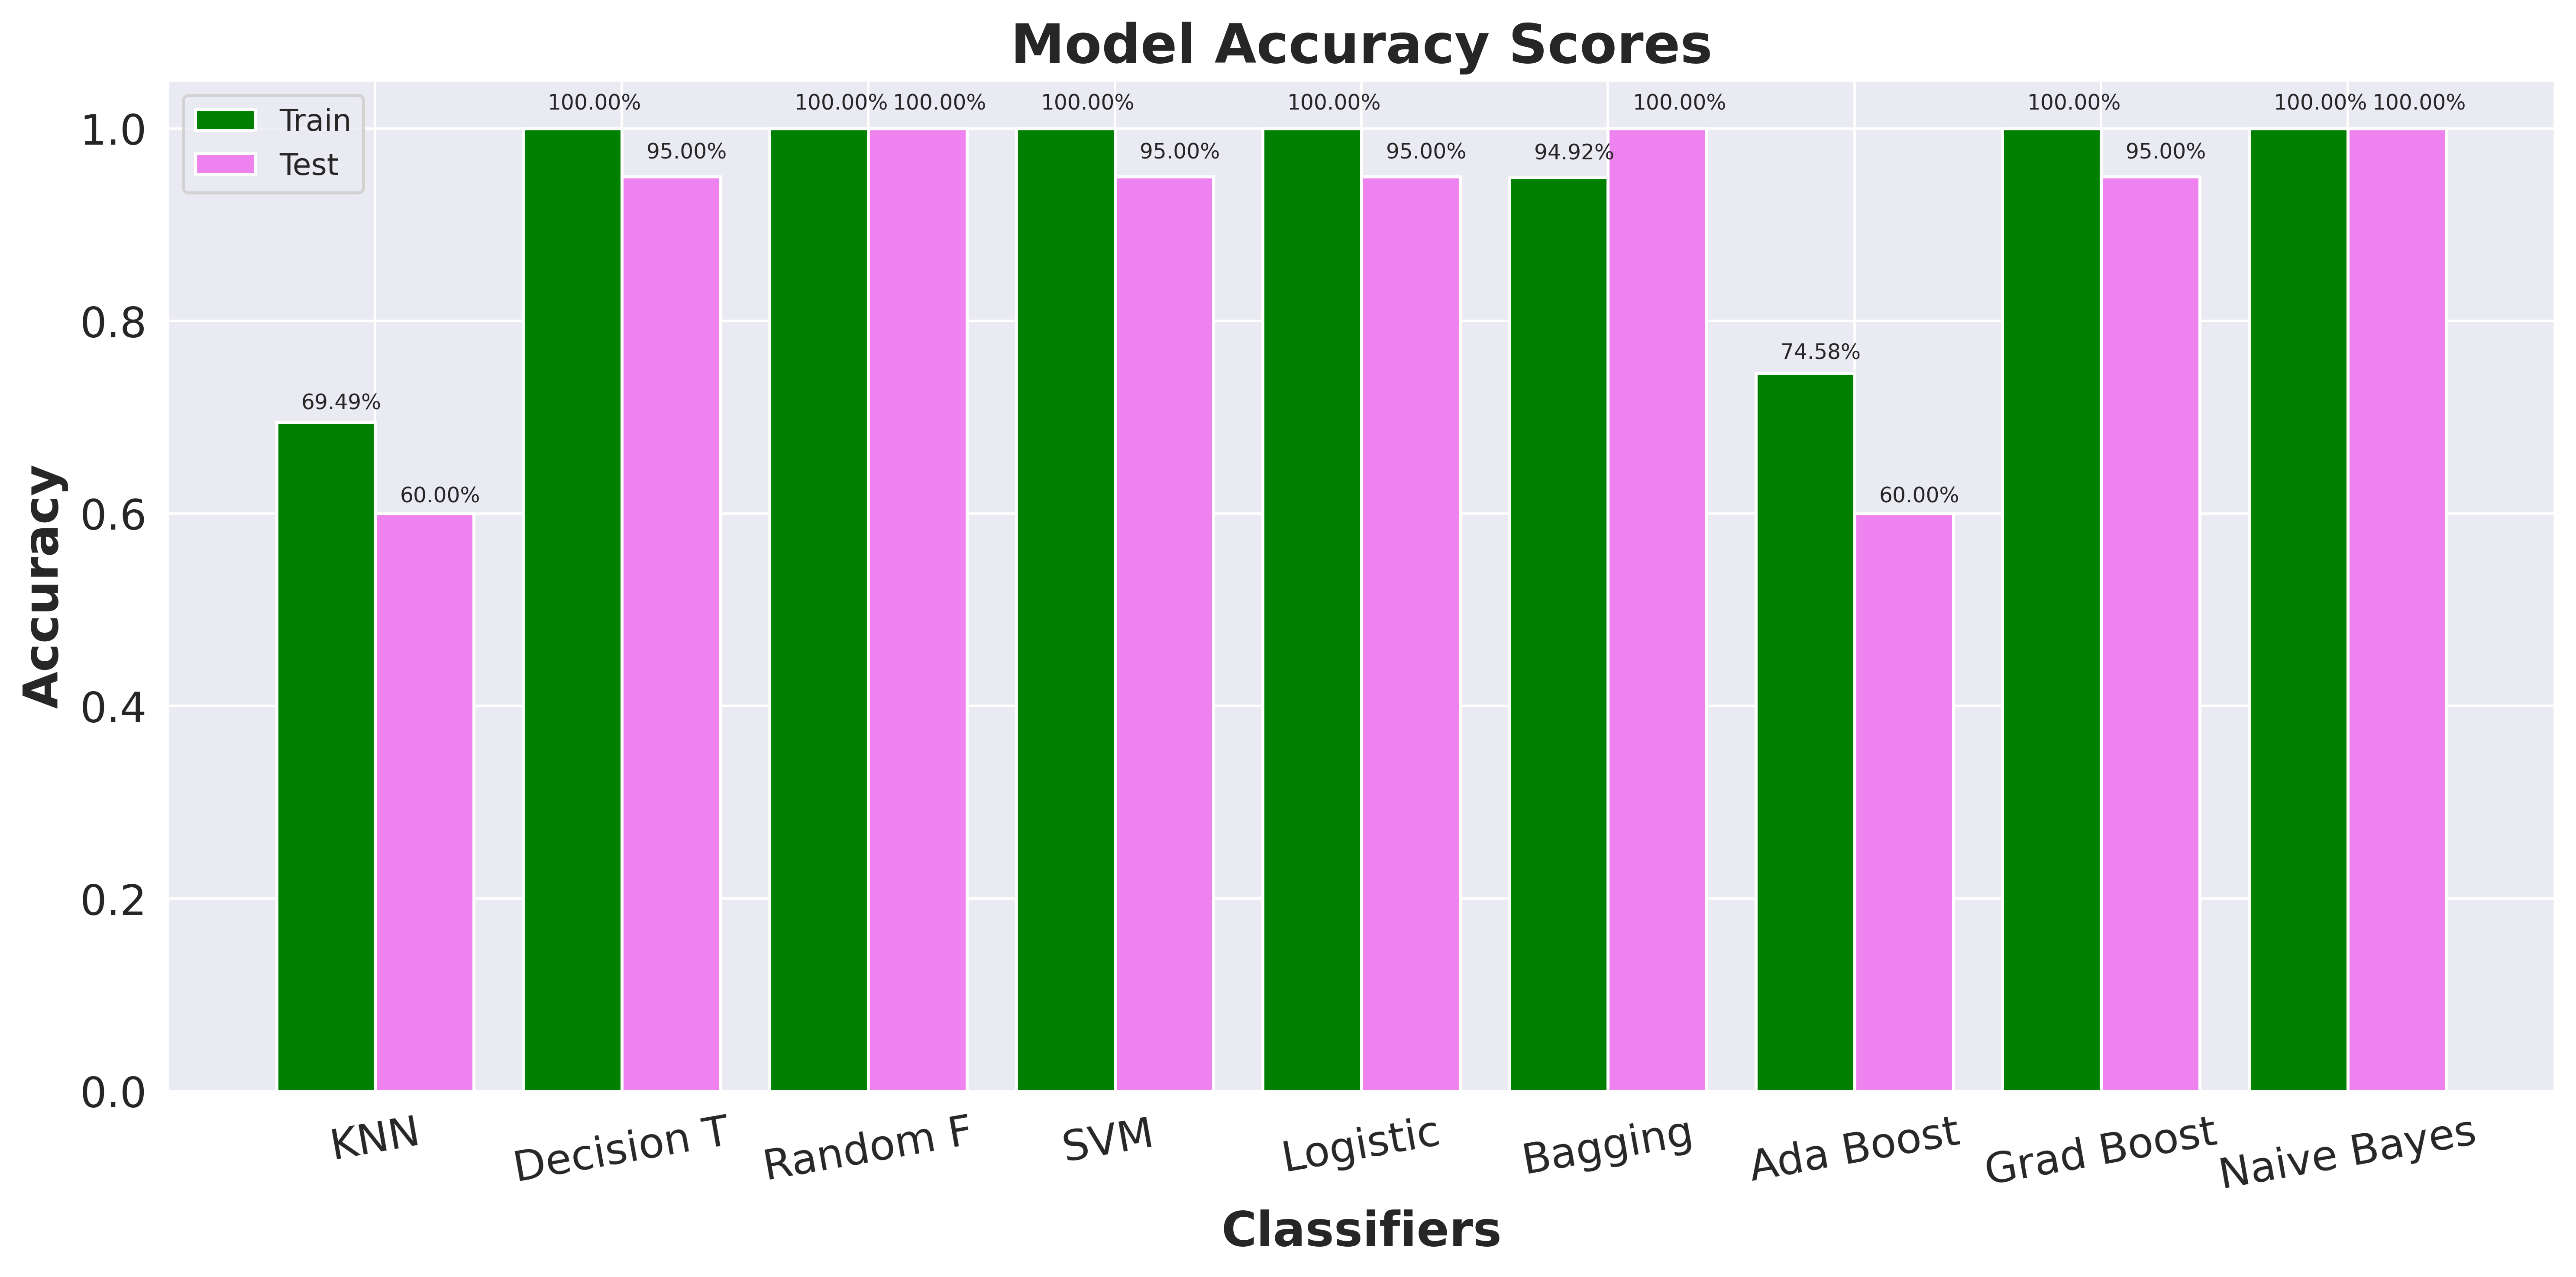

In [82]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Green")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "Violet")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

**17. Model Deployment**

**17.1 Pickle File**

In [85]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [86]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))

**THE END !!**